In [1]:
import pandas as pd
dfW = pd.read_csv("data_refined.csv")
dfI = pd.read_csv("insurance.csv")

In [2]:
dfI.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Does the dataset include any missing values? If so, delete the missing values entries
dfI.isnull().sum(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**Encoding categorical data**

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dfI['sex']= encoder.fit_transform(dfI['sex'])
dfI['smoker']= encoder.fit_transform(dfI['smoker'])
dfI['region']= encoder.fit_transform(dfI['region'])

dfI.dropna()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [5]:
dfI.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


**Scaling features - Normalization**

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = dfI.iloc[:, :].values

dfI.iloc[:, :] = scaler.fit_transform(X)

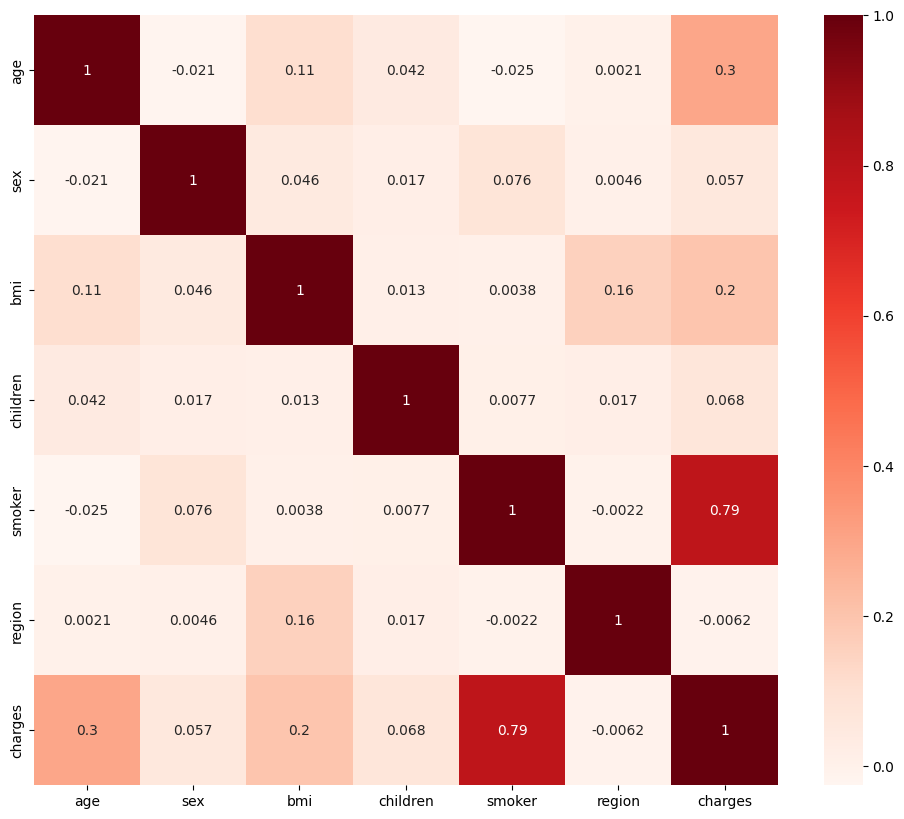

In [7]:
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(12,10))
cor = dfI.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [8]:
dfI.drop(["sex", "children"], axis=1, inplace=True)

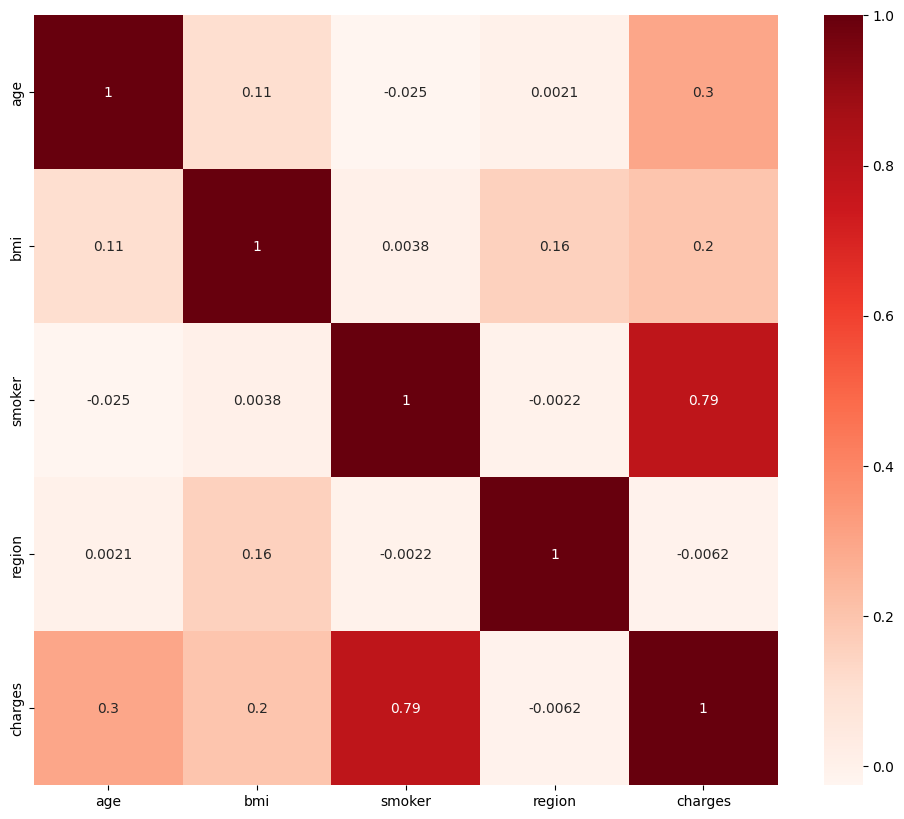

In [9]:
plt.figure(figsize=(12,10))
cor = dfI.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

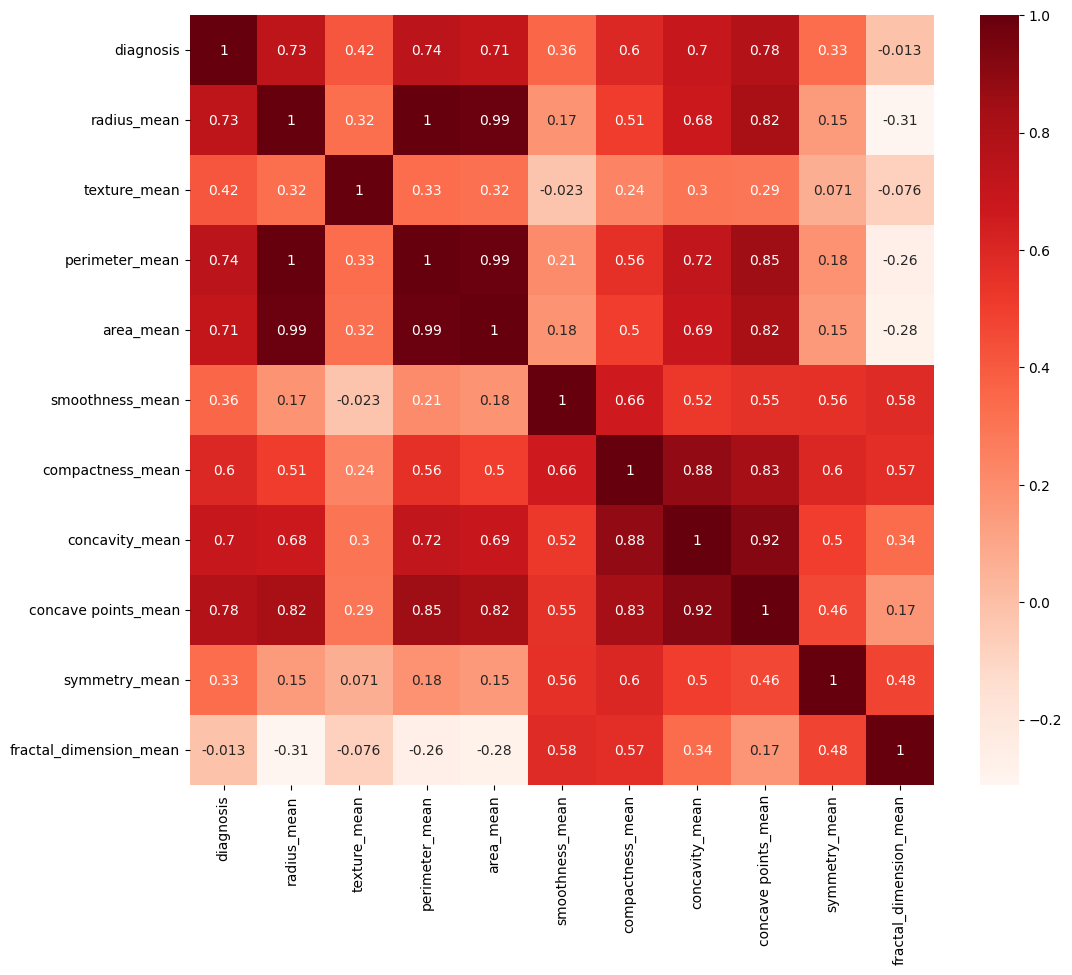

In [10]:
plt.figure(figsize=(12,10))
cor = dfW.corr()
sn.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
dfW.drop(["symmetry_mean", "fractal_dimension_mean"], axis=1, inplace=True)

**Clustering**

In [12]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5, tol=0.01, random_state=0).fit_predict(X)

dfI["clusters"] = clusters.tolist()

C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


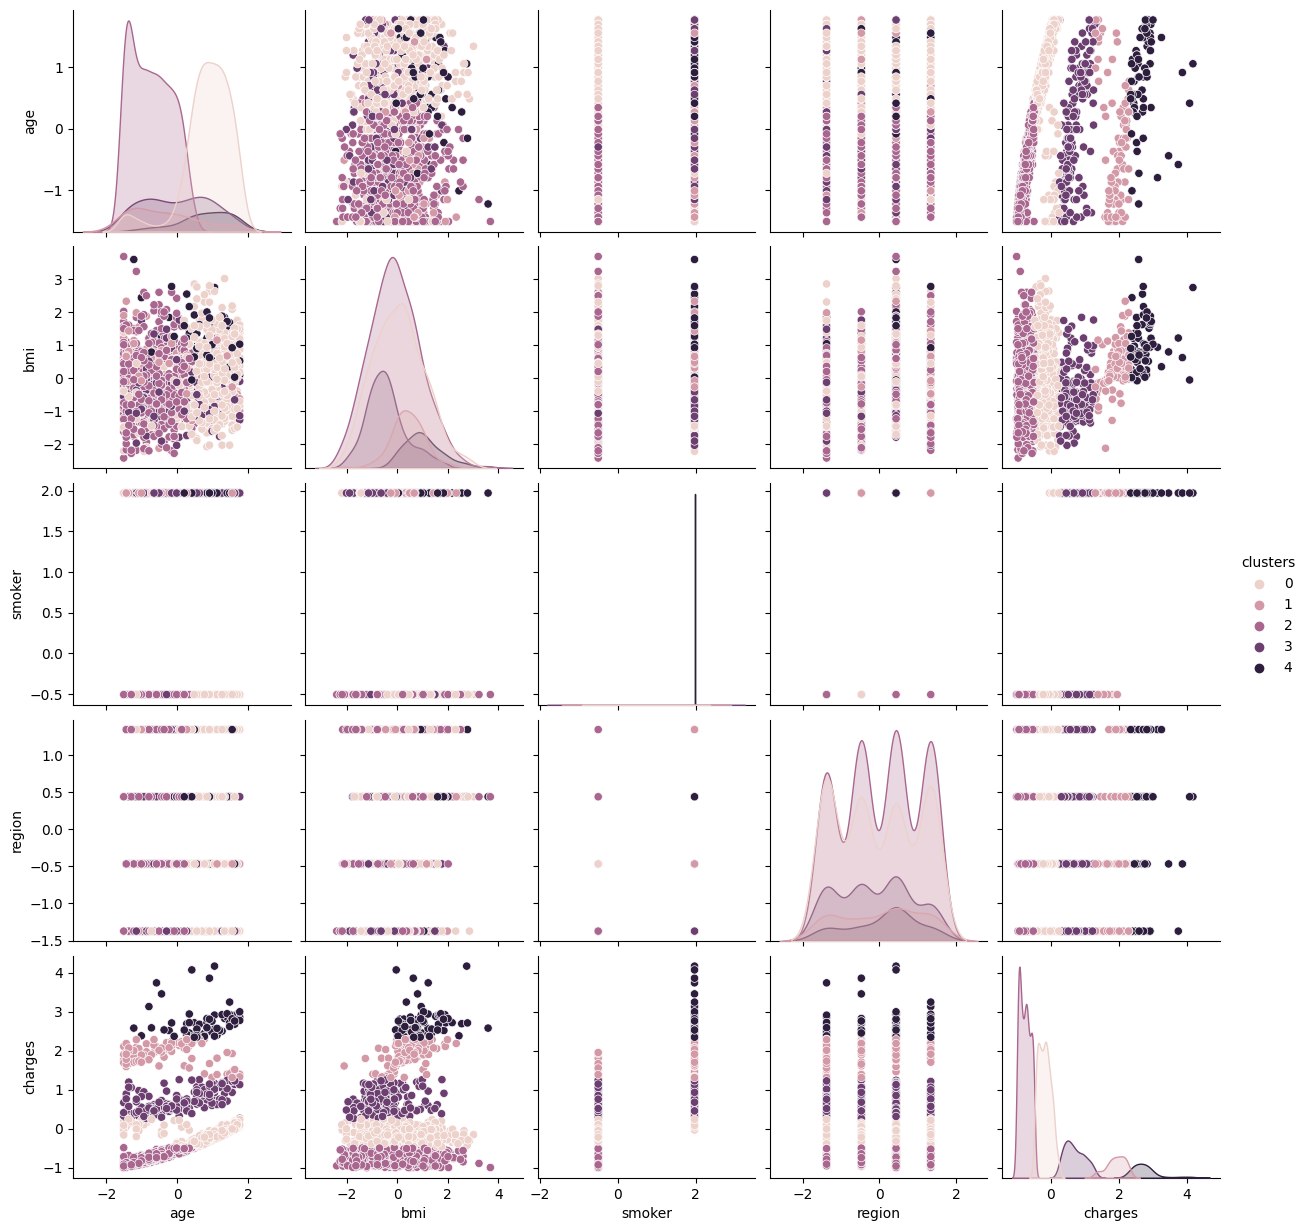

In [13]:
sn.pairplot(dfI, hue="clusters")

In [33]:
distortions = []
spread = range(1, 20)

for k in spread:
    model = KMeans(n_clusters=k)
    model.fit(X)
    distortions.append(model.inertia_)
    print('k: ', k, 'inertia: ', model.inertia_)

C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  1 inertia:  196074539341.69


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  2 inertia:  48015233363.631546


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  3 inertia:  22969418901.039963


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  4 inertia:  12124928462.89136


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  5 inertia:  8540998562.564462


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  6 inertia:  6166936844.948823


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  7 inertia:  4435306796.31389


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  8 inertia:  3496564439.784587


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  9 inertia:  2781656650.333965


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  10 inertia:  2251596529.2154474


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  11 inertia:  1841151624.9505763


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  12 inertia:  1496799698.3691328


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  13 inertia:  1274107159.7876654


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  14 inertia:  1083383759.467723


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  15 inertia:  919267332.1742892


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  16 inertia:  834716707.8585825


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  17 inertia:  752647062.6932969


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  18 inertia:  666599390.5604205


C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


k:  19 inertia:  603904227.0666219


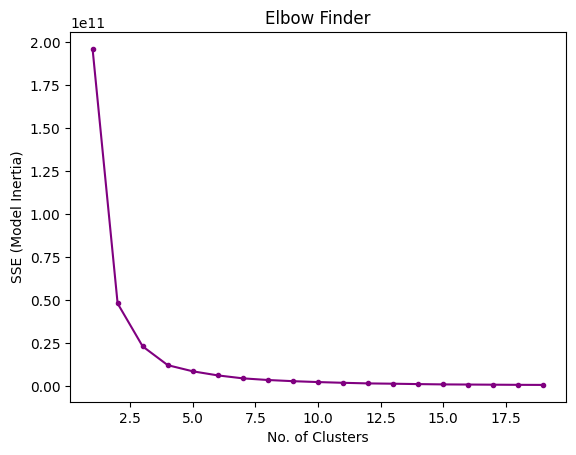

In [15]:
import matplotlib.pyplot as plt

plt.plot(spread, distortions, marker = ".", c="purple")
plt.title("Elbow Finder")
plt.xlabel("No. of Clusters")
plt.ylabel("SSE (Model Inertia)")
plt.show()

In [16]:
clusters = KMeans(n_clusters=3, tol=0.01, random_state=0).fit_predict(X)

C:\Users\angel\anaconda3\envs\pml\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [17]:
dfI["clusters_optimized"] = clusters.tolist()

**Mean-Shift clustering**

In [31]:
from sklearn.cluster import MeanShift
import numpy as np

mean_shift= MeanShift(bandwidth = 0.5)
mean_shift.fit(X)
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_1 = len(labels_unique)

mean_shift= MeanShift(bandwidth = 1)
mean_shift.fit(X)
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_2 = len(labels_unique)

mean_shift= MeanShift(bandwidth = 1.5)
mean_shift.fit(X)
labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_3 = len(labels_unique)


In [32]:
print("Clusters (BW=0.5) = %d" % n_clusters_1)
print("Clusters (BW=1) = %d" % n_clusters_2)
print("Clusters (BW=1.5) = %d" % n_clusters_3)

Clusters (BW=0.5) : 1326
Clusters (BW=1) : 1310
Clusters (BW=1.5) : 1287
